# About the Dataset


    1. Downloaded from "https://archive.ics.uci.edu/ml/datasets/auto+mpg"

# Importing the libraries

In [1]:
#Importing the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### Load the dataset

In [2]:
data = pd.read_csv('autompg.csv', na_values=['?'])

### View the data

In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## VARIABLES 
   ### DEPENDENT VARIABLE / TARGET:
1. Miles per Gallon(mpg) – Continuous
  ### INDEPENDENT VARIABLES: 
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Deep copy and shallow copy

In [4]:
data_copy = data 

In [5]:
# here the copy of data is taken
data_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Data Cleaning 

In [6]:
# droppping car name 

data_copy.drop('car name', axis=1, inplace=True)

In [7]:
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [8]:
data_copy.shape


(398, 8)

In [9]:
data_copy['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [10]:
data_copy.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [11]:
data_copy.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [12]:
# here you have 6 values null in horse power 
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data_imputed = pd.DataFrame(my_imputer.fit_transform(data_copy), columns = data_copy.columns)

In [13]:
# Checking for null values

data_imputed.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### EDA

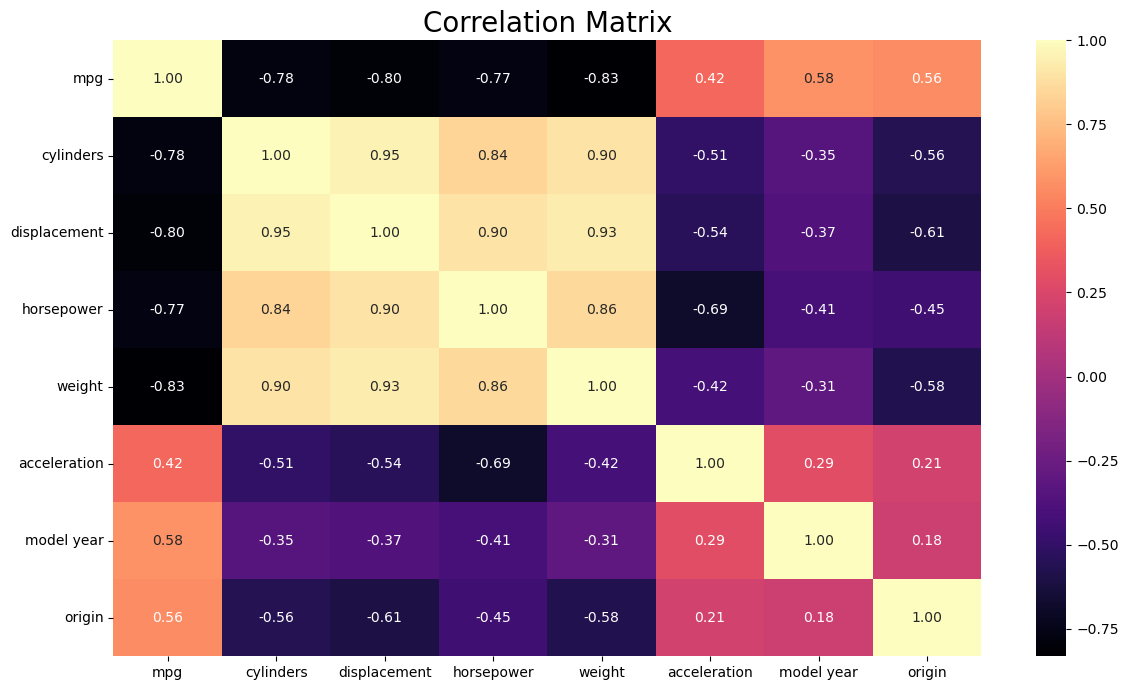

In [14]:
#Correlation

f, ax = plt.subplots(figsize= [14, 8])
sns.heatmap(data_imputed.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

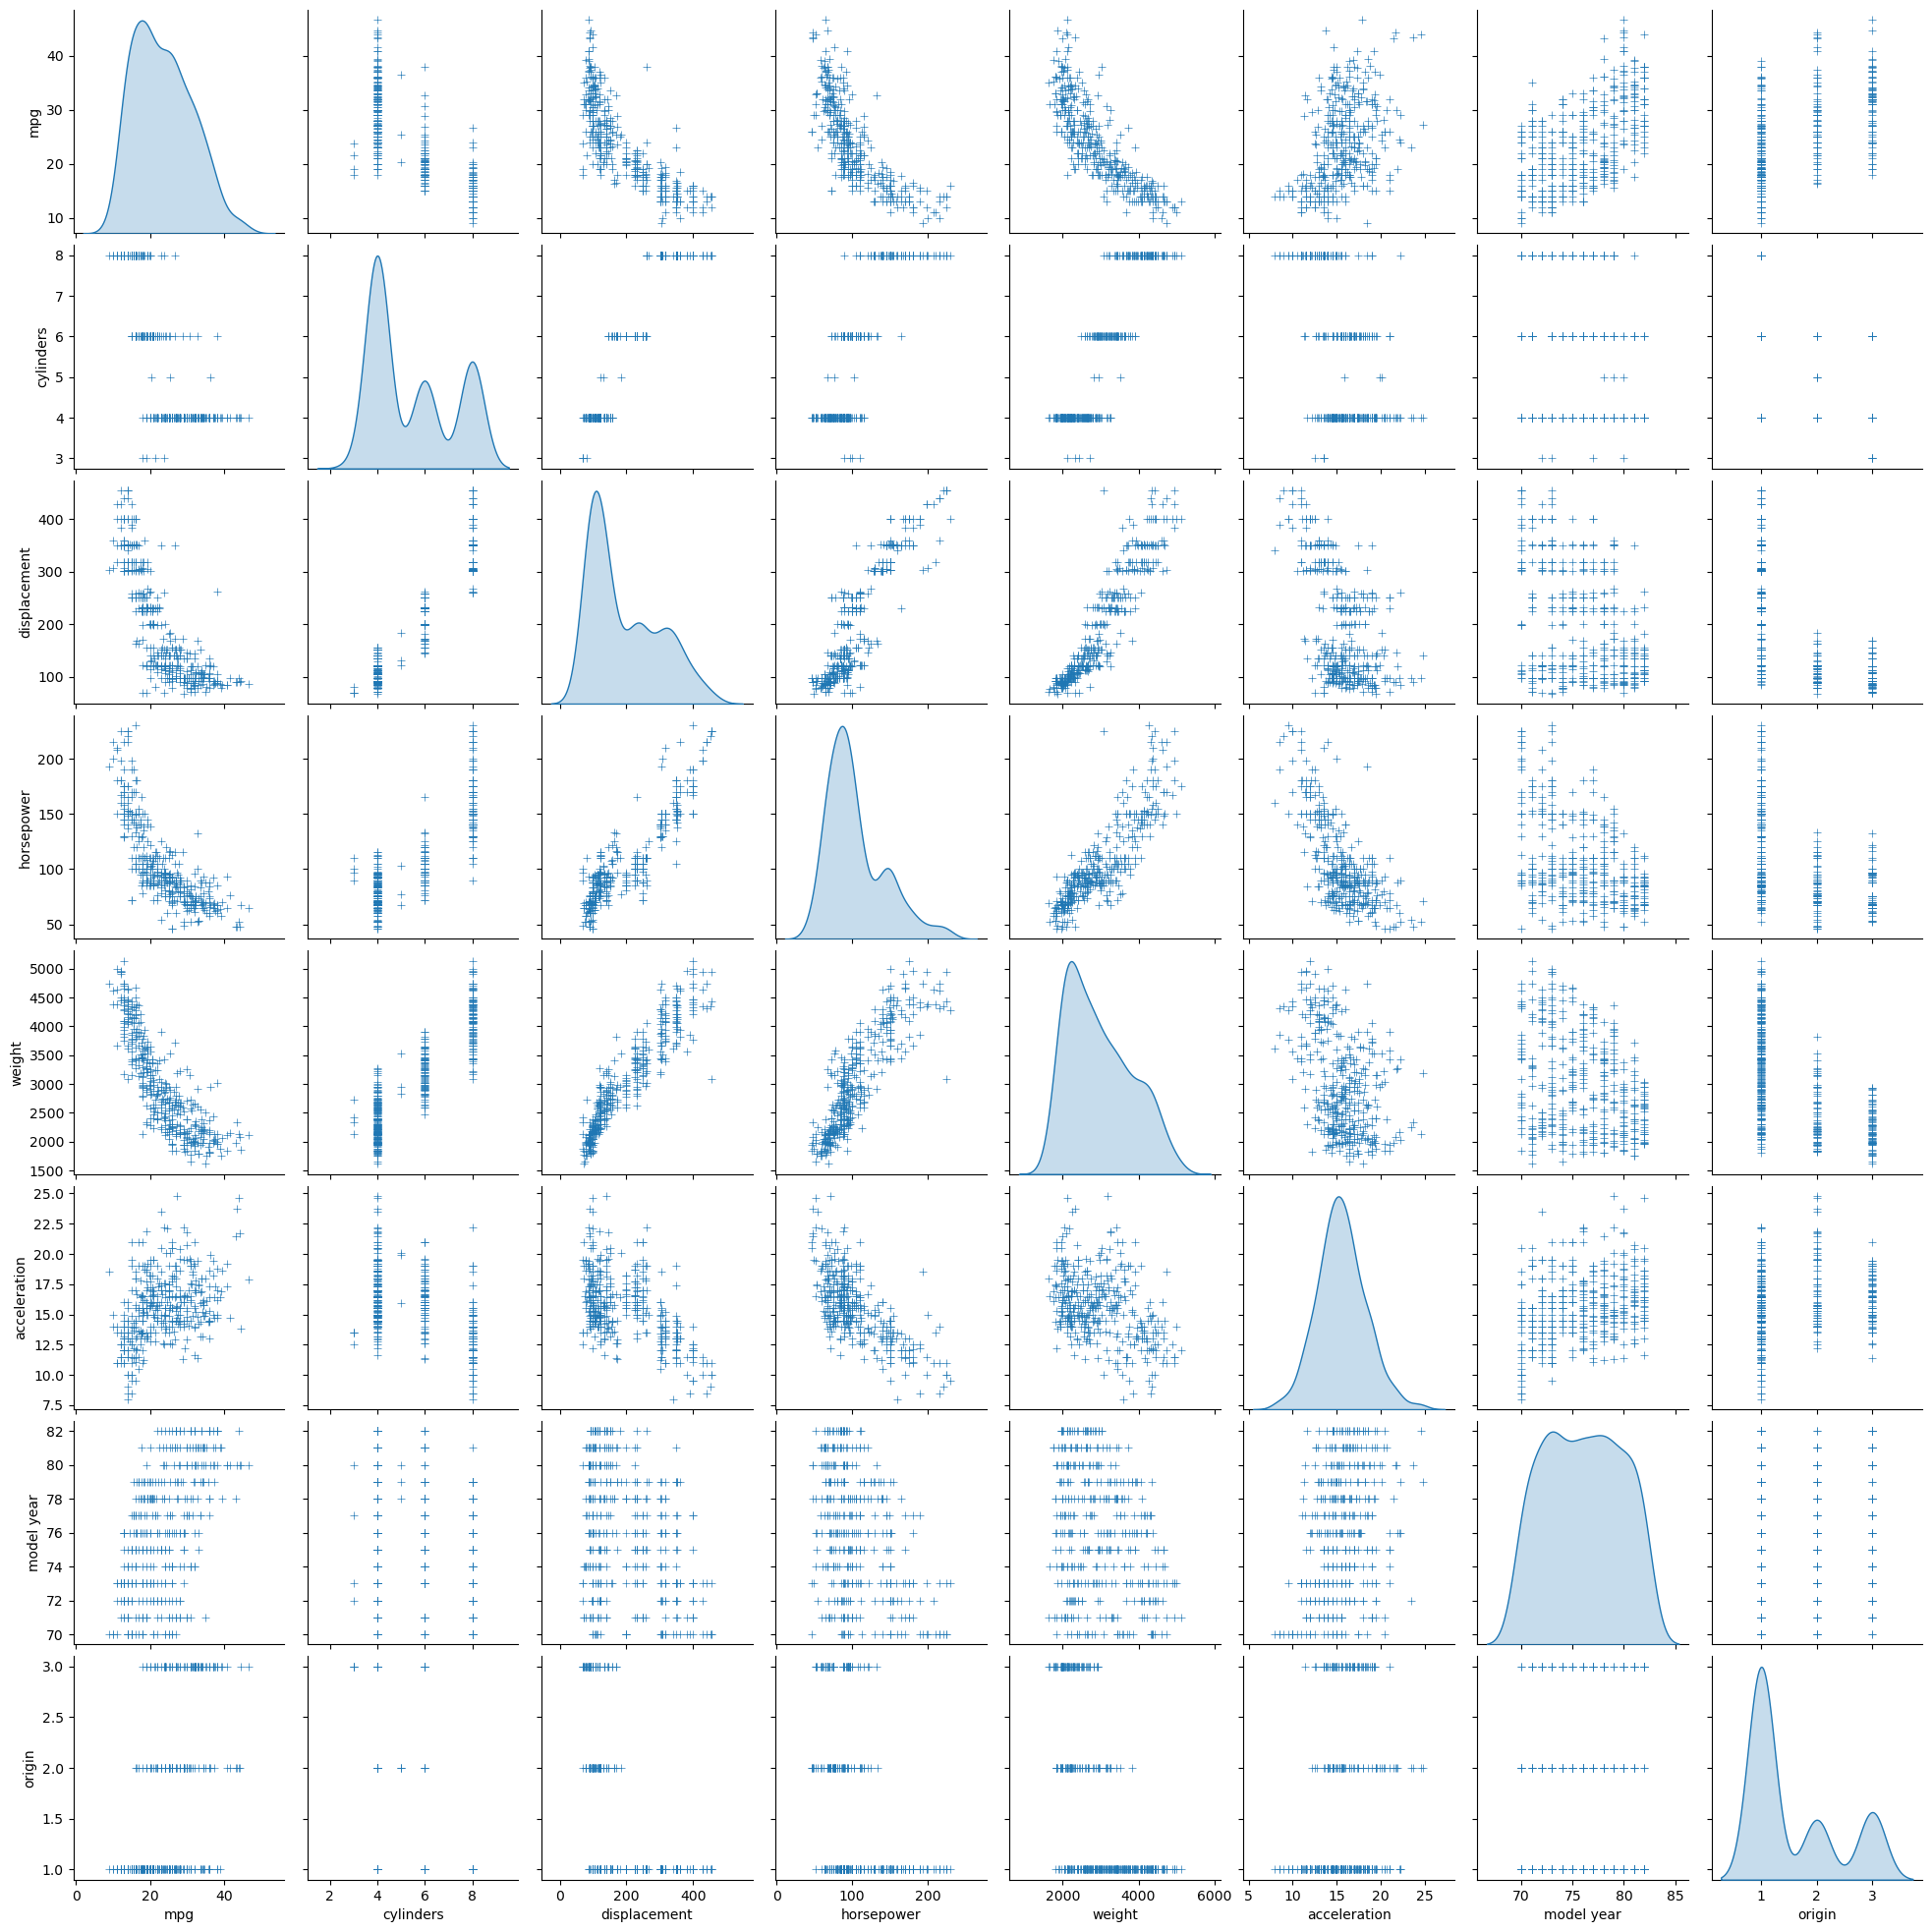

In [15]:
sns.pairplot(data_imputed, diag_kind='kde', markers='+')

<Axes: xlabel='origin', ylabel='mpg'>

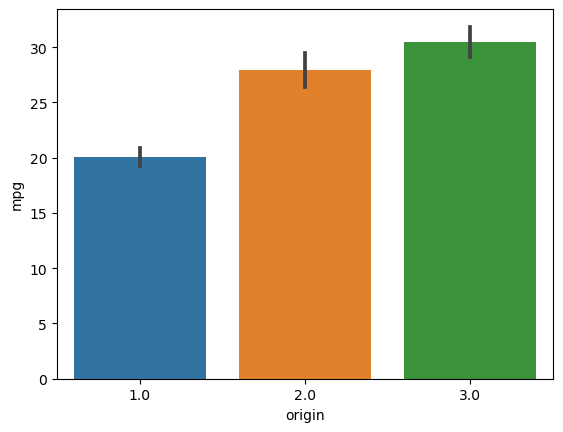

In [16]:
sns.barplot(x='origin', y='mpg', data=data_imputed)
# here 1-> USA, 2->Japan, 3->Europe based on the dataset

Text(0.5, 1.0, 'Consumption Gallon by Years')

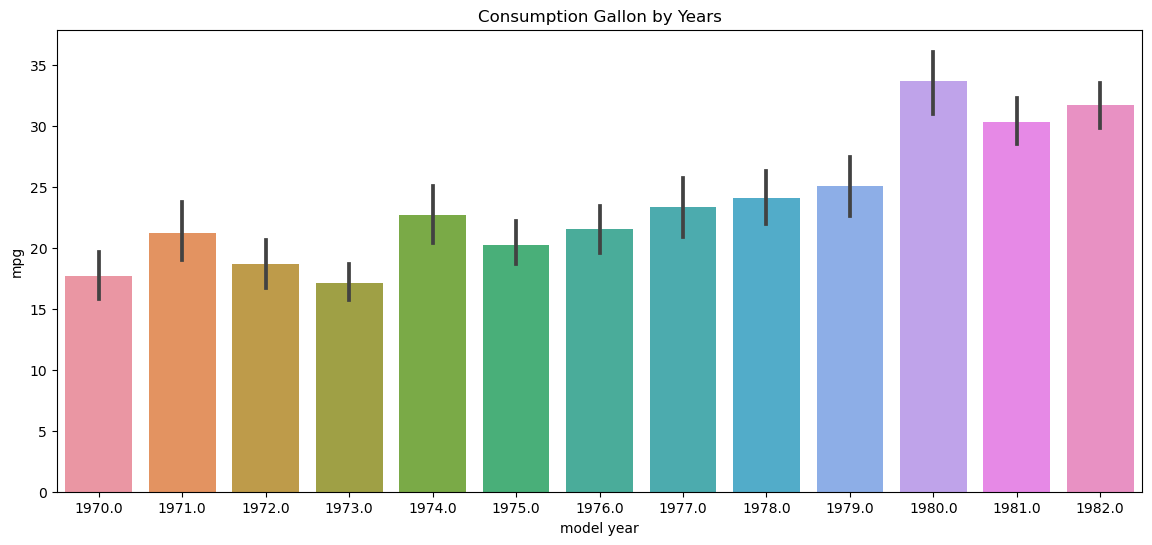

In [17]:
plt.figure(figsize=[14, 6])
sns.barplot(x=data_imputed['model year']+1900, y=data_imputed['mpg'])
plt.title('Consumption Gallon by Years')

<Axes: xlabel='mpg', ylabel='Density'>

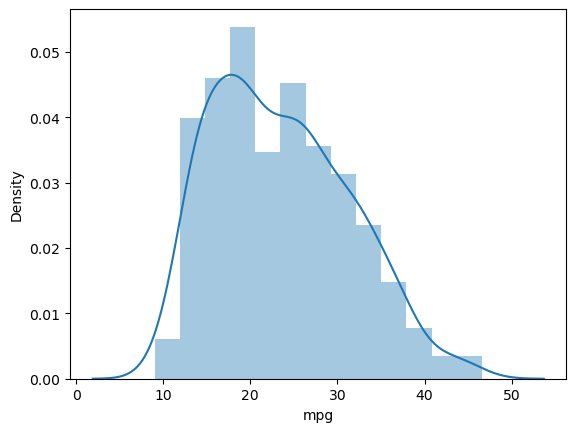

In [18]:
#Skewness
#feature- dependent variable
sns.distplot(data_imputed['mpg'])

<Axes: xlabel='mpg', ylabel='Density'>

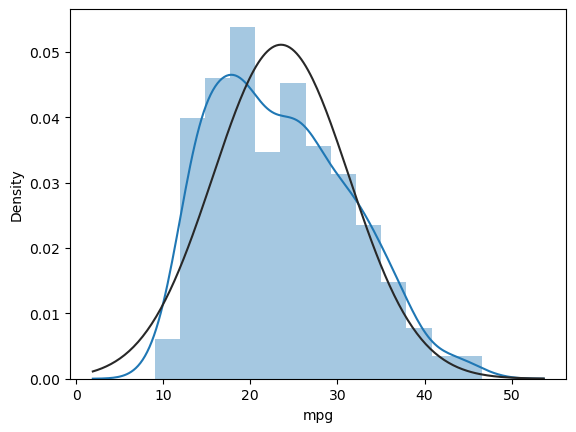

In [19]:
sns.distplot(data_imputed['mpg'], fit=norm)

# Split the dataset

In [20]:
X = data_imputed[['cylinders','displacement','horsepower','weight','acceleration','model year', 'origin']].values.reshape(398, 7)


In [21]:
X.shape

(398, 7)

In [22]:
y = data_imputed[['mpg']].values.reshape(398, 1)

In [23]:
y.shape

(398, 1)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import category_encoders as ce

###  train and test split method 

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Apply the model

In [26]:
model_rfr = RandomForestRegressor(n_estimators=7)
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()

In [28]:
models = [model_rfr, model_dt, model_lr]

# Fitting the Models to Traing data

In [30]:
for model in models:
    print("fitting model:",(model))
    model.fit(X_train,y_train)

fitting model: RandomForestRegressor(n_estimators=7)
fitting model: DecisionTreeRegressor()
fitting model: LinearRegression()


# Score of Training data

In [31]:
for model in models:
    print("score of", (model),"for training data:", (model.score(X_train,y_train)))

score of RandomForestRegressor(n_estimators=7) for training data: 0.9750376967189334
score of DecisionTreeRegressor() for training data: 1.0
score of LinearRegression() for training data: 0.8145999291645734


# Score of testing data

In [32]:
for model in models:
    print("score of", (model),"for testing data:", (model.score(X_test,y_test)))

score of RandomForestRegressor(n_estimators=7) for testing data: 0.9042719756904773
score of DecisionTreeRegressor() for testing data: 0.8029148689749496
score of LinearRegression() for testing data: 0.8451188734322982


# Creating Function for regression Results

In [33]:
def regression_results(y_test, y_predicted):
    
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_predicted)
    mse = metrics.mean_squared_error(y_test, y_predicted)
    r2 = metrics.r2_score(y_test, y_predicted)

    print('r2:', round(r2, 4))
    print('MAE:', round(mean_absolute_error,4))
    print('MSE:', round(mse, 4))
    print('RMSE:', round(np.sqrt(mse), 4))

# Predicting values for X_test 

In [34]:
for model in models[:]:
    y_predicted = model.predict(X_test)
    
    print(f"Report:{model}")
    print(f"{regression_results(y_test, y_predicted)}")

Report:RandomForestRegressor(n_estimators=7)
r2: 0.9043
MAE: 1.6254
MSE: 5.5924
RMSE: 2.3648
None
Report:DecisionTreeRegressor()
r2: 0.8029
MAE: 2.455
MSE: 11.5137
RMSE: 3.3932
None
Report:LinearRegression()
r2: 0.8451
MAE: 2.2331
MSE: 9.0482
RMSE: 3.008
None


# Conclusion

RandomForestRegressor outperforms DecisionTreeRegressor and LinearRegression, so it is the best fit Algorithm for this Dataset to Proceeed